In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import load_performance

In [2]:
import sys
sys.path.append(r"C:\Users\sanjy\Downloads\Employee_Attrition_Prediction")

In [3]:
models_dict = load_performance(r"C:\Users\sanjy\Downloads\Employee_Attrition_Prediction\best_models.pkl")

In [4]:
df = pd.DataFrame(models_dict).T

In [5]:
df

,accuracy,precision,recall,f1
DT_imbalanced,0.834694,0.429333,0.130496,0.191331
KNN_imbalanced,0.848299,0.771429,0.088830,0.157362
LR_imbalanced,0.874830,0.752972,0.345922,0.471772
RF_imbalanced,0.861905,0.841220,0.181472,0.296389
SVM_imbalanced,0.867347,0.741336,0.283067,0.406212
DT_oversampled,0.872669,0.826466,0.944028,0.880892
KNN_oversampled,0.884422,0.812960,0.999190,0.896413
LR_oversampled,0.763576,0.753199,0.785902,0.768741
RF_oversampled,0.965533,0.947871,0.985402,0.966208
SVM_oversampled,0.965123,0.936343,0.998381,0.966294


In [6]:
df_imbalanced = df[df.index.str.contains("imbalanced")]
df_imbalanced

,accuracy,precision,recall,f1
DT_imbalanced,0.834694,0.429333,0.130496,0.191331
KNN_imbalanced,0.848299,0.771429,0.088830,0.157362
LR_imbalanced,0.874830,0.752972,0.345922,0.471772
RF_imbalanced,0.861905,0.841220,0.181472,0.296389
SVM_imbalanced,0.867347,0.741336,0.283067,0.406212


In [7]:
df_oversampled = df[df.index.str.contains("oversampled")]
df_oversampled

,accuracy,precision,recall,f1
DT_oversampled,0.872669,0.826466,0.944028,0.880892
KNN_oversampled,0.884422,0.812960,0.999190,0.896413
LR_oversampled,0.763576,0.753199,0.785902,0.768741
RF_oversampled,0.965533,0.947871,0.985402,0.966208
SVM_oversampled,0.965123,0.936343,0.998381,0.966294


In [8]:
df_undersampled = df[df.index.str.contains("undersampled")]
df_undersampled

,accuracy,precision,recall,f1
DT_undersampled,0.664614,0.685082,0.616135,0.647218
KNN_undersampled,0.736305,0.792683,0.641844,0.707874
LR_undersampled,0.706629,0.709212,0.709043,0.707492
RF_undersampled,0.761568,0.756799,0.772518,0.763995
SVM_undersampled,0.729854,0.734810,0.738652,0.731825


In [9]:
print("Imbalanced mean performance:")
print(df_imbalanced.mean())

print("\nOversampled mean performance:")
print(df_oversampled.mean())

print("\nUndersampled mean performance:")
print(df_undersampled.mean())

Imbalanced mean performance:
accuracy     0.857415
precision    0.707258
recall       0.205957
f1           0.304613
dtype: float64

Oversampled mean performance:
accuracy     0.890265
precision    0.855368
recall       0.942581
f1           0.895710
dtype: float64

Undersampled mean performance:
accuracy     0.719794
precision    0.735717
recall       0.695638
f1           0.711680
dtype: float64


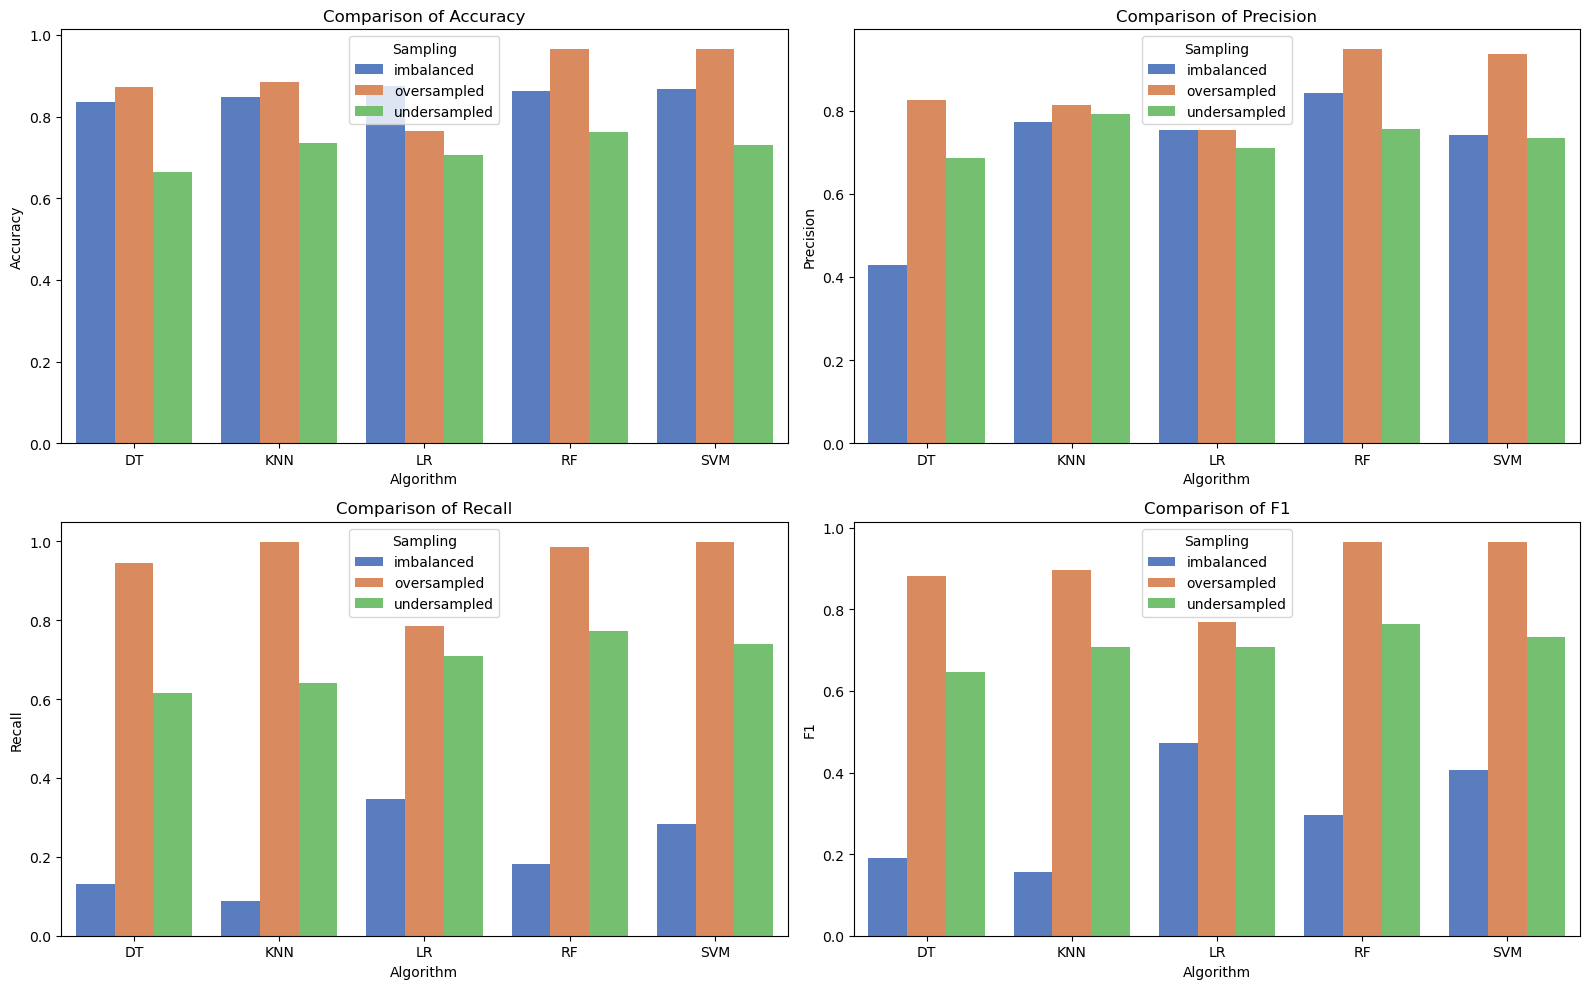

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index and extract sampling strategy + algorithm
df_reset = df.reset_index().rename(columns={"index": "Model"})
df_reset["Sampling"] = df_reset["Model"].str.extract("(imbalanced|oversampled|undersampled)")
df_reset["Algorithm"] = df_reset["Model"].str.extract("(DT|KNN|LR|RF|SVM)")

metrics = ["accuracy", "precision", "recall", "f1"]

fig, axes = plt.subplots(2, 2, figsize=(16,10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(
        data=df_reset,
        x="Algorithm", y=metric, hue="Sampling",
        ax=axes[i], palette='muted'
    )
    axes[i].set_title(f"Comparison of {metric.capitalize()}")
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_xlabel("Algorithm")

plt.tight_layout()
plt.show()